In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


In [5]:
haberman=pd.read_csv("haberman.csv")

In [6]:
print(haberman.shape)

(306, 4)


In [7]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**OBSERVATION**


**age means when at what age patient had his operation
year means in which year patient did its operation,
nodes :Number of positive axillary nodes detected 
 Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.**

In [8]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**OBSERVATION**

** Here we have 225 patient who can live more than 5 years and 81 patient who live less than 5 year.**

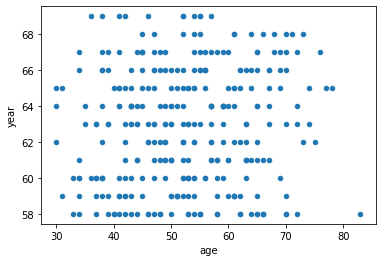

In [9]:
haberman.plot(kind='scatter', x='age', y='year');

plt.show()


In [10]:
warnings.filterwarnings("ignore") 

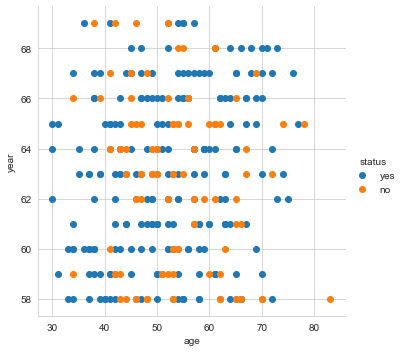

In [25]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status",size=5) \
   .map(plt.scatter, "age", "year")\
   .add_legend()
   
plt.show();
warnings.filterwarnings("ignore") 

**OBSERVATION**

**It is difficult to predict the data because it show overlap with all the possibilites.**

<h2>Univarite</h2>

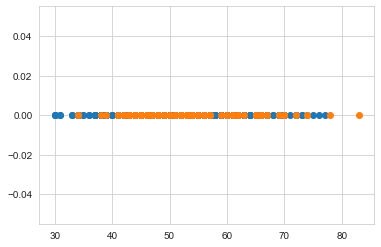

In [12]:
import numpy as np
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];


plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o')

**OBSERVATION**

 **can't predict the value because of overlap**

<h2>PDF</h2>

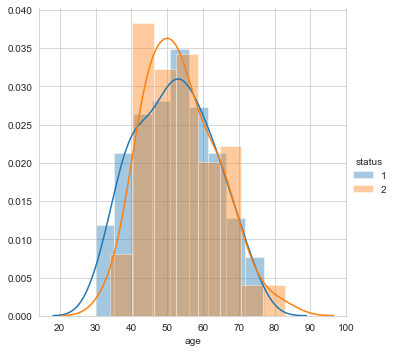

In [13]:
warnings.filterwarnings("ignore") 
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

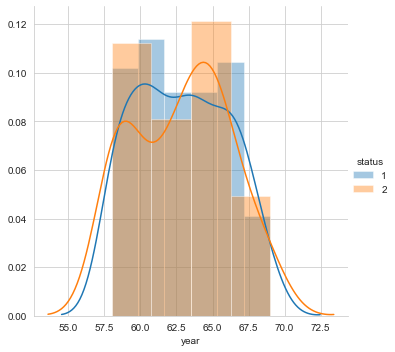

In [14]:
warnings.filterwarnings("ignore") 
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

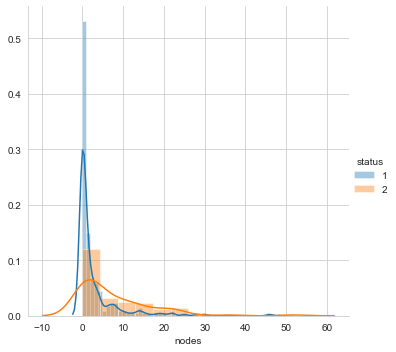

In [15]:
warnings.filterwarnings("ignore") 
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

<h2>CDF</h2>

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


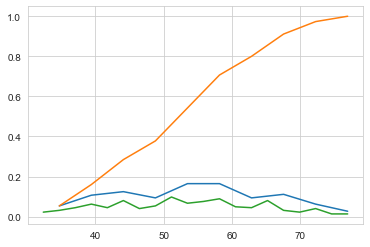

In [16]:

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

**OBSERVATION**

**The main difference between CDF and PDF is that when we want to find the values in between 50-60 in PDF it will find the value
like it will take the values from 0-60 and subtract the values from 0-50 to find the values form 50-60
while in CDF it will directly find the values in between 60-50
so its better to use CDF instead of PDF for fast processing**

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


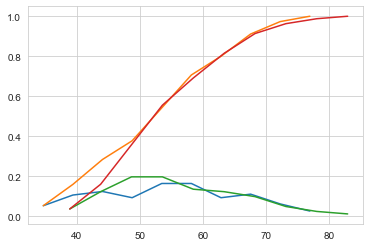

In [26]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

<h2>MEAN,MEDIAN,STANDARD DEVIATION AND IQR</h2>

In [18]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<h2>BOX PLOT</h2>

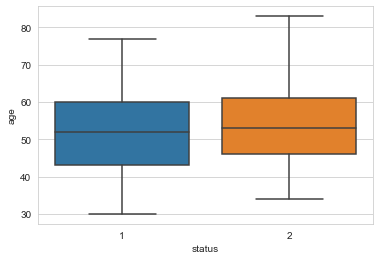

In [19]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

**OBSERVATION**

**Here there are 3 qartiles First medium and Third quartile 
here we called line as wiskers and the two graph shows overlaping **

<h2>Violin plot</h2>

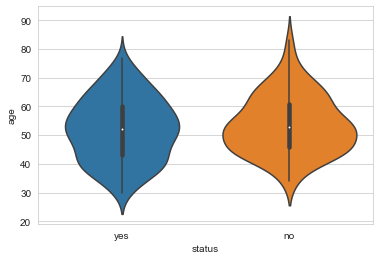

In [27]:
sns.violinplot(x="status",y="age",data=haberman)
plt.show()


<h1>MultiVariate</h1>

<h2>Pair Plot</h2>

In [28]:
haberman['status']=haberman['status'].replace(1,'yes') 
haberman['status']=haberman['status'].replace(2,'no')

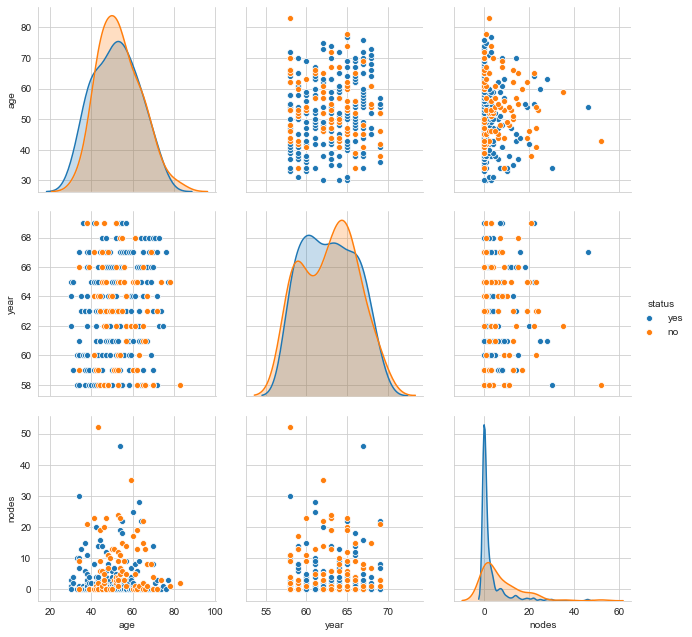

In [29]:
warnings.filterwarnings("ignore") 
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()

**OBSERVATION**

**In this when we  look for all the possibilites it shows overalap so it is difficult to predict which is better**

<h2>Median,quantiles,percentiles,MAD</h2>

In [30]:
print("\nMedians:")
print(np.median(haberman_1["age"]))

print(np.median(np.append(haberman_1["age"],50)));
print(np.median(haberman_2["age"]))



print("\nQuantiles:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


**OBSERVATION**

**Here median is use to find the middle values. And median is better than mean is because it doesn't get corrupted like mean if the difference between the firt and last values are high its average gets corrupted 
while in median it finds the average by middle values of data. MAD which is median absolute deviation which is same as standard deviation which is used to find at which point the graph is deviated** 

<h2>Final Observation</h2>

** we cannot predict the patient survival rate because of too much of overlaping**